# Curso de Optimización (DEMAT)
## Tarea 6
##Leslie Janeth Quincosa Ramírez

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Marzo 11, 2022**   |
| Fecha límite de entrega de la tarea: | **Marzo 20, 2022**   |


### Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales. 
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimirlo 
  y puede anexar sólo el notebook en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No lo incluya dentro del ZIP**, porque la idea que lo pueda accesar 
  directamente para poner anotaciones y la calificación de cada ejercicio.



---

## Ejercicio 1 (5 puntos)

Programar el método de Newton con tamaño de paso fijo $\alpha=1$.

La función recibe como parámetros la función que calcula el gradiente $g(x)$ de la
función objetivo $f: \mathbb{R}^n \rightarrow \mathbb{R}$, 
la  función que calcula la Hessiana $H(x)$ de $f$, 
un punto inicial $x_0$, un número  máximo de iteraciones $N$, 
y la  tolerancia $\tau>0$. Fijar $k=0$ y repetir los siguientes pasos:

1. Calcular el gradiente $g_k$ en el punto $x_k$, $g_k = g(x_k)$.
2. Si $\|g_k\| < \tau$,  hacer  $res=1$ y terminar. 
3. Si no se cumple el criterio, calcular la Hessiana $H_k = H(x_k)$.
4. Intentar calcular la factorización de Cholesky de $H_k$.
5. Si la factorización no se puede realizar, imprimir el mensaje de error,
   hacer $res=0$ y terminar el ciclo.
6. Si se obtuvo la factorización, resolver el sistema de ecuaciones
   $H_k p_k = -g_k$ (esto da la dirección de descenso como $p_k$).
7. Calcular el siguiente punto de la secuencia como
   $$x_{k+1} = x_k + p_k $$
8. Si $k+1\geq N$, hacer $res=0$ y terminar.
9. Si no, hacer $k = k+1$ y volver el paso 1.
10. Devolver el punto $x_k$, $g_k$, $k$ y $res$.

---

**Nota:** Para calcular la factorización de Cholesky y resolver el sistema de ecuaciones
puede usar las funciones `scipy.linalg.cho_factor` y `scipy.linalg.cho_solve`.
Si la matriz no es definida positiva, la función `cho_factor` lanza la excepción
`scipy.linalg.LinAlgError`. Puede usar esto para terminar el ciclo.

---

1. Programe la función que implementa el algoritmo del método de Newton,
   almacenando en una lista los puntos $x_0, x_1, ..., x_k$ que genera
   el algoritmo. Haga que la función devuelva esta lista.
2. Use la función de Rosenbrock, su gradiente y Hessiana para probar el algoritmo.

* Use $N=1000$, la tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$ es el
  épsilon de la máquina, y el  punto inicial $x_0= (-1.2, 1)$.
* Si el algoritmo converge, imprima un mensaje que indique esto y 
  genere una gráfica que muestre las curvas de nivel de la función $f$ y 
  la trayectoria de los puntos $x_0, x_1, ..., x_k$.
  Para generar esta gráfica use una discretización de los intervalos 
  $[-1.5, 1.5]$ en la dirección $X$  y $[-1, 2]$ en la dirección $Y$.
* Imprima el punto final $x_k$, $f(x_k)$,
  la magnitud del gradiente $g_k$ y el número de iteraciones $k$ realizadas.
* Repita la prueba partiendo del punto inicial $x_0= (-12, 10)$.

### Solución:

In [226]:
# En esta celda puede poner el código de las funciones
# o poner la instrucción para importarlas de un archivo .py

import numpy as np
from numpy import linalg as LA
from numpy.linalg import eigvals
import sys 
from scipy.linalg import cho_factor, cho_solve, LinAlgError
import numpy as np
import matplotlib.pyplot as plt

def NewtonPasoFijo(f, g, H, x0, N, tol):
    lista = []
    lista.append(x0)
    xk = x0      
    for k in range(N):
      gk = g(xk)
      norm = LA.norm(gk)
      if norm < tol:
          res = 1
          break
      else:
          Hk = H(xk)
          try:
              L, low = cho_factor(Hk, lower = True) 
              pk = cho_solve((L,low), -gk)
              fk = f(xk)
              xk = xk + pk
              lista.append(xk)
              if k+1 >= N:
                  res = 0
                  break
          except LinAlgError:
              print("Error")
              res=0
              break
              
    return xk, gk, k, res, lista

In [227]:
# Pruebas realizadas a la función de Rosenbrock
eps = sys.float_info.epsilon
tol = eps**(1/3)

def function(x):
    xT = x.T
    return 100 * (xT[1] - xT[0]**2)**2 + (1-xT[0])**2
    
def gradient(x):
    xT = x.T
    return np.array([-400*xT[0]*(xT[1]- xT[0]**2) -2*(1-xT[0]), 200*(xT[1]-xT[0]**2)])

def Hessian(x):
    xT = x.T
    return np.array([[1200*xT[0]**2-400*xT[1]+2, -400*xT[0]], [-400*xT[0], 200]])

x01 = np.array([-1.2, 1])
x02 = np.array([-12, 10])

In [228]:
# Prueba realizada a la función del Ejercicio 1
def ejercicio1(f, g, H, x0, N, tol):
    xk, gk, k, res, lista = NewtonPasoFijo(f, g, H, x0, N, tol)
    print('xk:', xk)
    print('gk:', gk)
    print('k:', k)
    print('res:', res)
    print('lista:', lista)
    if res == 1:
      print('El algoritmo converge :)')
    a = np.array([punto[0] for punto in lista]) #valores de x en la lista
    b = np.array([punto[1] for punto in lista])

    xlist = np.linspace(a.min()-1, a.max()+1, 100)
    ylist = np.linspace(b.min()-1, b.max()+1, 100) #Usé un rango más grande en y, porque los puntos se salían del rango
    X, Y = np.meshgrid(xlist, ylist)
    Z = 100 * (Y - X**2)**2 + (1-X)**2
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z) #Curvas de nivel como mapa de calor
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Curvas de nivel Rosembrock')
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    plt.scatter(a, b)
    for i in range(1, k+1):
        ax.annotate(i, lista[i-1], fontsize=15, color='white')
    plt.show()

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z) #Curvas de nivel con líneas
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Curvas de nivel Rosembrock')
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    plt.scatter([punto[0] for punto in lista], [punto[1] for punto in lista])
    for i in range(1, k+1):
        ax.annotate(i, lista[i-1], fontsize=15, color='red')

Método de Newton, con punto (-1.2, 1.0): 
xk: [1. 1.]
gk: [ 7.41096051e-09 -3.70548037e-09]
k: 6
res: 1
lista: [array([-1.2,  1. ]), array([-1.1752809 ,  1.38067416]), array([ 0.76311487, -3.17503385]), array([0.76342968, 0.58282478]), array([0.99999531, 0.94402732]), array([0.9999957 , 0.99999139]), array([1., 1.])]
El algoritmo converge :)


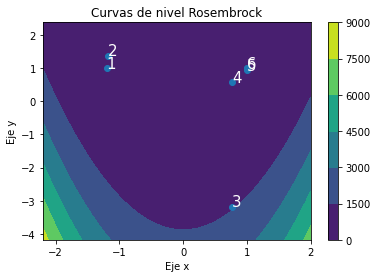

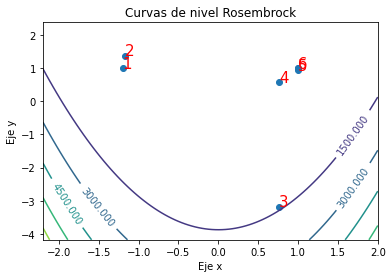

In [229]:
print('Método de Newton, con punto (-1.2, 1.0): ')
ejercicio1(function, gradient, Hessian, x01, 1000, tol)



Método de Newton, con punto (-12, 10): 
xk: [1. 1.]
gk: [ 7.41096051e-09 -3.70548037e-09]
k: 6
res: 1
lista: [array([-1.2,  1. ]), array([-1.1752809 ,  1.38067416]), array([ 0.76311487, -3.17503385]), array([0.76342968, 0.58282478]), array([0.99999531, 0.94402732]), array([0.9999957 , 0.99999139]), array([1., 1.])]
El algoritmo converge :)


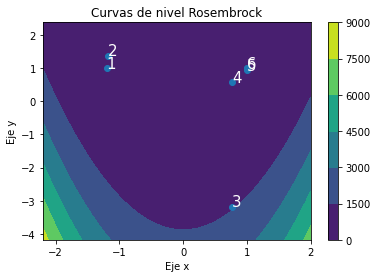

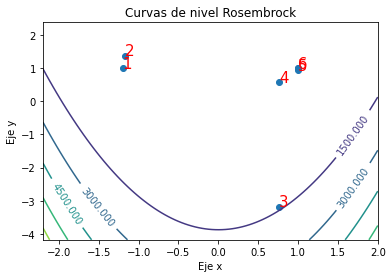

In [230]:
print('Método de Newton, con punto (-12, 10): ')
ejercicio1(function, gradient, Hessian, x01, 1000, tol)

Podemos ver que converge en muy pocas iteraciones. La trayectoria de los puntos es interesante cómo pasa del punto 2 al 3 con paso grande y luego se va haciendo más pequeño el paso al encontrar el punto optimo.

## Ejercicio 2 (5 puntos)

Programar el método de Newton con tamaño de paso ajustado por el algoritmo de backtracking.

1. Modifique la función del Ejercicio 2 que implementa el algoritmo del
   método de Newton para incluir como parámetros a la función objetivo $f(x)$ y 
   los parámetros $\rho$ y $c_1$ del algoritmo de backtraking.
* Después de obtener la dirección de descenso $p_k$, 
  calcular el tamaño de paso $\alpha_k$ usando como valor inicial  $\bar{\alpha}_0 = 1$
  en el algoritmo de backtracking.
* Hacer 
  $$x_{k+1} = x_k + \alpha_k p_k. $$
2. Repita la prueba del algoritmo, como se indicó en el Ejercicio 1,
   a la función de Rosenbrock, para ver como cambia la
   trayectoria de los puntos $x_0, x_1, ..., x_k$ en comparación con el resultado anterior, partiendo de $x_0= (-1.2, 1)$ y de $x_0= (-12, 10)$.


In [231]:
# En esta celda puede poner el código de las funciones
# o poner la instrucción para importarlas de un archivo .py
def Backtraking(f, fk, gk, xk, pk, a0, rho, c):
    a = a0
    while f(xk + a*pk) > fk +c*a*gk.T@pk:
        a = rho*a
    return a

def NewtonBack(f, g, H, x0, N, tol, rho, c):
    xk = x0
    a0 = 1
    lista = []
    lista.append(x0)
    for k in range(N):
      gk = g(xk)
      norm = LA.norm(gk)
      if norm < tol:
          res = 1
          break
      else:
          Hk = H(xk)
          L, low = cho_factor(Hk)
          if low == 'numpy.linalg.LinAlgError':
              print('LinAlgError')
              res=0
              break
          else:
              pk = cho_solve((L,low), -gk)
              ak = a0
              fk = f(xk)
              ak = Backtraking(f, fk, gk, xk, pk, a0, rho, c)
              xk = xk + ak*pk
              lista.append(xk)
              if k+1 >= N:
                res = 0
                break
    return xk, gk, k, res, lista

In [232]:
# Pruebas realizadas a la función de Rosenbrock
eps = sys.float_info.epsilon
tol = eps**(1/3)

def ejercicio2(f, g, H, x0, N, tol, rho, c):
    xk, gk, k, res, lista = NewtonBack(f, g, H, x0, N, tol, rho, c)
    print('xk:', xk)
    print('gk:', gk)
    print('k:', k)
    print('res:', res)
    print('lista:', lista)
    if res == 1:
      print('El algoritmo converge :)')

    a = np.array([punto[0] for punto in lista]) #valores de x en la lista
    b = np.array([punto[1] for punto in lista])

    xlist = np.linspace(a.min()-1, a.max()+1, 100)
    ylist = np.linspace(b.min()-1, b.max()+1, 100) #Usé un rango más grande en y, porque los puntos se salían del rango
    X, Y = np.meshgrid(xlist, ylist)
    Z = 100 * (Y - X**2)**2 + (1-X)**2
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z) #Curvas de nivel como mapa de calor
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Curvas de nivel Rosembrock')
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    plt.scatter(a, b)
    for i in range(1, k+1):
        ax.annotate(i, lista[i-1], fontsize=15, color='white')
    plt.show()

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z) #Curvas de nivel con líneas
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Curvas de nivel Rosembrock')
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    plt.scatter([punto[0] for punto in lista], [punto[1] for punto in lista])
    for i in range(1, k+1):
        ax.annotate(i, lista[i-1], fontsize=15, color='red')

Método de Newton, con punto (-1.2, 1.0): 
xk: [0.99999973 0.99999946]
gk: [-2.03422623e-07 -1.66502301e-07]
k: 19
res: 1
lista: [array([-1.2,  1. ]), array([-1.1752809 ,  1.38067416]), array([-0.85007205,  0.61635318]), array([-0.76693718,  0.58128123]), array([-0.46313703,  0.11812088]), array([-0.39097246,  0.14765174]), array([-0.11189836, -0.06843575]), array([-0.04722077, -0.00195339]), array([ 0.18632637, -0.0222965 ]), array([0.25193037, 0.05916503]), array([0.45776461, 0.16508041]), array([0.51257126, 0.25972553]), array([0.70745095, 0.4614274 ]), array([0.7406503 , 0.54746068]), array([0.87665362, 0.74962788]), array([0.90246511, 0.81377705]), array([0.98853189, 0.96978781]), array([0.99315334, 0.98633219]), array([0.99997088, 0.99989528]), array([0.99999973, 0.99999946])]
El algoritmo converge :)


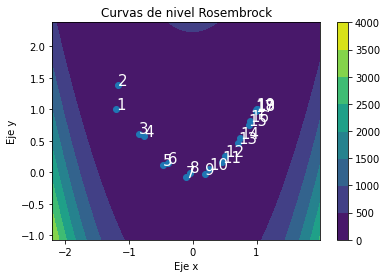

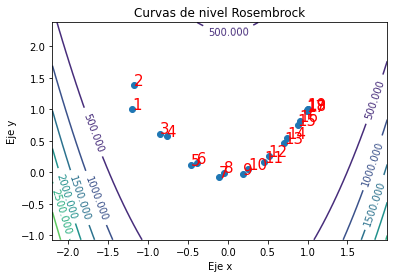

In [233]:
# Prueba realizada a la función del Ejercicio 1
print('Método de Newton, con punto (-1.2, 1.0): ')
ejercicio2(function, gradient, Hessian, x01, 1000, tol, 0.8, 0.00001)

Método de Newton, con punto (-12, 10): 
xk: [1. 1.]
gk: [-4.05206980e-11 -1.72417636e-10]
k: 57
res: 1
lista: [array([-12,  10]), array([-11.99951494, 143.98835864]), array([-11.42781713, 130.26816579]), array([-11.24056018, 126.3151281 ]), array([-10.7400023 , 115.07351626]), array([-10.5297084 , 110.83053542]), array([-10.05000195, 100.74631143]), array([-9.83850072, 96.75136374]), array([-9.28058767, 85.79621085]), array([-9.12855141, 83.30733575]), array([-8.65635922, 74.69253384]), array([-8.45930757, 71.52105521]), array([-8.01730554, 64.05889755]), array([-7.81538697, 61.03950237]), array([-7.32233818, 53.35364309]), array([-7.16706686, 51.34273821]), array([-6.70738643, 44.76151749]), array([-6.54164701, 42.76567602]), array([-6.06596161, 36.55339566]), array([-5.92321181, 35.06406064]), array([-5.47624156, 29.77573897]), array([-5.32803202, 28.36595909]), array([-4.94355447, 24.27613959]), array([-4.76623149, 22.6855192 ]), array([-4.36117771, 18.84045804]), array([-4.21581977

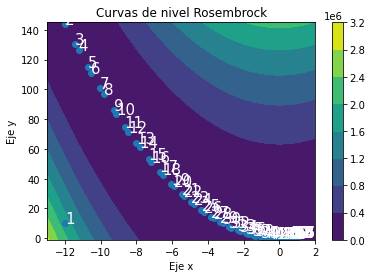

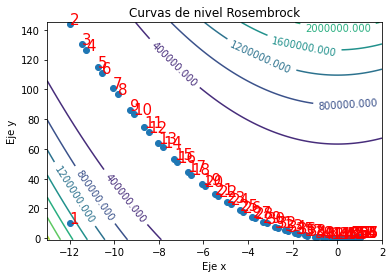

In [234]:
# Prueba realizada a la función del Ejercicio 1
print('Método de Newton, con punto (-12, 10): ')
ejercicio2(function, gradient, Hessian, x02, 1000, tol, 0.8, 0.0001)

Converge en más iteraciones que el algoritmo del ejercicio 1, pero vemos que al modificar el valor de $c$ y $\rho$ cambia el número de iteraciones del algoritmo, intenté con otros valores, pero me resultaron más iteraciones. Fue lo más que pude mínimizar al tanteo (en clase vimos que no es posible calcular exactamente cuáles son los valores de $c$ y $\rho$ que mínimizan las iteraciones).